# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [829]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [830]:
# from google.colab import drive
# drive.mount('/content/drive')

In [831]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [832]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [833]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl


In [834]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = joblib.load('./data2.pkl')
data.head()

,Date,weekday,holiday,board_rate,taxi_rate,mean_time_7days,next_mean_time
1,2015-01-02,Saturday,0.0,0.898987,0.132996,20.200000,26.2
2,2015-01-03,Sunday,0.0,0.918689,0.126820,22.200000,24.5
3,2015-01-04,Weekday,0.0,0.927096,0.119077,22.775000,26.2
4,2015-01-05,Weekday,0.0,0.877647,0.099059,23.460000,23.6
5,2015-01-06,Weekday,0.0,0.910298,0.104485,23.483333,24.7


## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [835]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.isna().sum() # 없어


Date               0
weekday            0
holiday            0
board_rate         0
taxi_rate          0
mean_time_7days    0
next_mean_time     0
dtype: int64

### (2) 가변수화

In [836]:
df.head(2)

,holiday,board_rate,taxi_rate,mean_time_7days,next_mean_time,weekday_Sunday,weekday_Weekday
Date,,,,,,,
2015-01-02,0.0,0.898987,0.132996,20.2,26.2,0,0
2015-01-03,0.0,0.918689,0.126820,22.2,24.5,1,0


In [837]:
# # 가변수화 안 할경우 숫자로 치환
# df = data.copy()
# df['quarter'] = df['quarter'].map({'1':1,'2':2,'3':3,'4':4})
# df['weekday'] = df['Date'].dt.weekday

In [838]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df = data.copy()
dumm_cols = ['weekday']
df = pd.get_dummies(data, columns =dumm_cols, drop_first=True, dtype=int)
list(df)

['Date',
 'holiday',
 'board_rate',
 'taxi_rate',
 'mean_time_7days',
 'next_mean_time',
 'weekday_Sunday',
 'weekday_Weekday']

In [839]:
df.set_index('Date', inplace=True)
# df.head(2)

### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [840]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 1) x, y 나누기

In [841]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# x와 y 분리
target = 'next_mean_time'
X = df.drop(target, axis=1)
y = df.loc[:,target]

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [842]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=91, shuffle=False)


In [843]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2829, 6) (2829,)
(91, 6) (91,)


### (4) Scaling
* KNN, SVM 알고리즘을 적용하기 위해서는 스케일링을 해야 합니다.

In [844]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [845]:
X_train

array([[0.        , 0.81213419, 0.14932394, 0.02149594, 0.        ,
        0.        ],
       [0.        , 0.86511988, 0.13473142, 0.05220443, 1.        ,
        0.        ],
       [0.        , 0.88772769, 0.11643201, 0.06103312, 0.        ,
        1.        ],
       ...,
       [0.        , 0.65797025, 0.0958278 , 0.39131388, 0.        ,
        1.        ],
       [0.        , 0.64615989, 0.0911531 , 0.39306866, 0.        ,
        1.        ],
       [0.        , 0.64629081, 0.09383354, 0.3871463 , 0.        ,
        1.        ]])

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [846]:
def pred_plot(y_val, pred, date):
    plt.figure(figsize = (18,6))
    sns.lineplot(x=date, y = y_val.values, label = 'actual value', marker = 'o')
    sns.lineplot(x=date, y = pred, label = 'predicted value', marker = 'o')
    plt.axhline(y_val.values.mean(), color='r')
    plt.ylim(0,60)
    plt.grid()
    plt.show()

### (1) 머신러닝

#### 1) LinearRegression

In [847]:
def cv_check(model, cv):
    cv_score = cross_val_score(
    model,
    X_train,
    y_train,
    cv=10,
    )
    print(cv_score)
    print(cv_score.mean())

In [848]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# 모델 불러오기
model = LinearRegression()

# 검증
cv_check(model, 10)

[0.29322241 0.10455581 0.10042682 0.44107792 0.27022423 0.44778706
 0.77476546 0.47852828 0.55138176 0.61850055]
0.40804703055851477


In [849]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 2) KNN

In [850]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
cv_check(model, 10)

[0.1948521  0.13484294 0.25781116 0.4411154  0.23451427 0.36766755
 0.75311548 0.53267713 0.48690883 0.53546622]
0.39389710957782065


In [851]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 3) Decision_Tree

In [852]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)
cv_check(model, 10)


[ 0.21851503 -0.07836817  0.05512522  0.45917902  0.20854002 -0.82726723
  0.74720542  0.52833915  0.48230241  0.57012985]
0.23637007295772886


<BarContainer object of 6 artists>

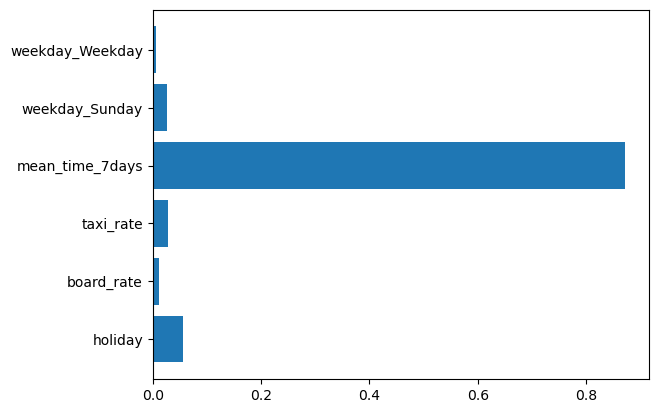

In [853]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model.fit(X_train, y_train)
plt.barh(y= list(X), width = model.feature_importances_)


#### 4) RandomForest

In [854]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=5)
cv_check(model, 10)

[ 0.29748201  0.07038434  0.14695012  0.46229134  0.2827372  -0.10392246
  0.80358654  0.59685805  0.57441249  0.61510308]
0.3745882709277154


<BarContainer object of 6 artists>

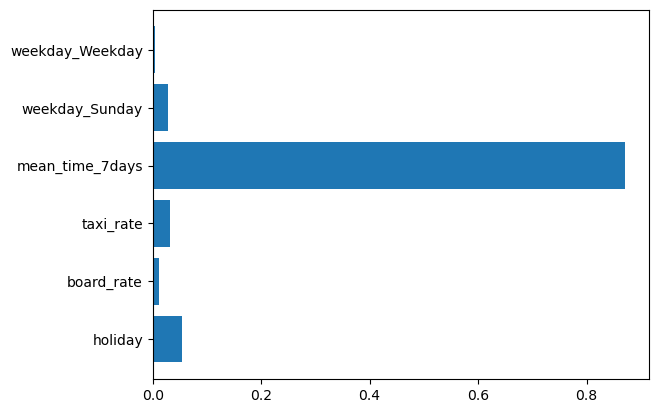

In [855]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model.fit(X_train, y_train)
plt.barh(y= list(X), width = model.feature_importances_)


#### 4) XGB

In [856]:
from xgboost import XGBRegressor
model = XGBRegressor(max_depth=5)
cv_check(model,10)

[0.18830532 0.09966234 0.14078819 0.47980665 0.2170829  0.18620726
 0.69059013 0.57778662 0.56499947 0.52751045]
0.36727393305204564


<BarContainer object of 6 artists>

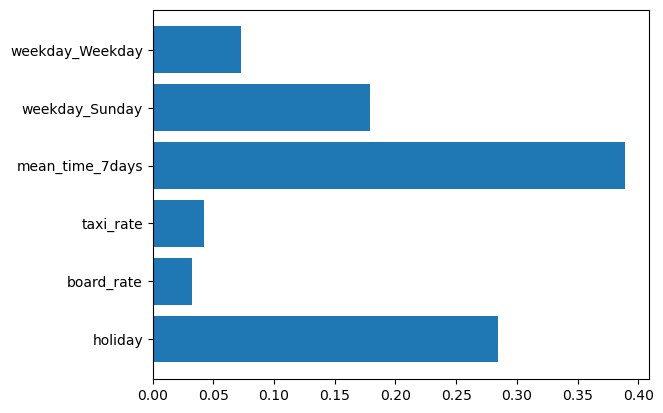

In [857]:
model.fit(X_train, y_train)
plt.barh(y= list(X), width = model.feature_importances_)

#### 5) LGBM

In [858]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(max_depth =5, verbose=-1)
cv_check(model,10)

[0.34735304 0.16859908 0.28049405 0.48974395 0.26671751 0.35504435
 0.80016924 0.62375959 0.62738627 0.62519566]
0.4584462754161274


<BarContainer object of 6 artists>

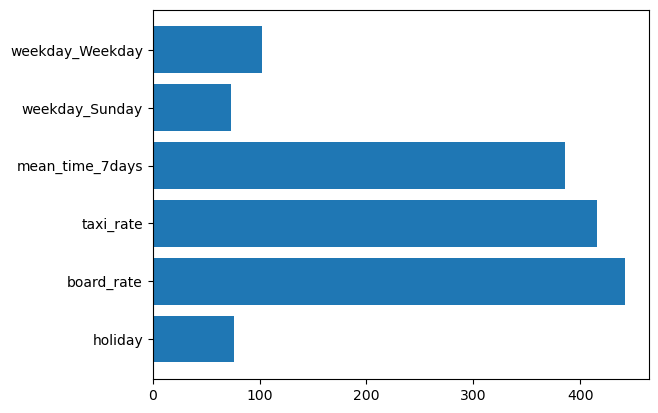

In [859]:
model.fit(X_train, y_train)
plt.barh(y= list(X), width = model.feature_importances_)

## 3.모델별 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

In [860]:
# LGBM 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV
model_lgbm = LGBMRegressor()
param = {
    'max_depth':range(3,15),
    'learning_rate':[0.01, 0.5, 0.1, 1]
    
}
model = GridSearchCV(model_lgbm,
                    param,
                    cv=10,
                    scoring='r2',
                    verbose=True)
model.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 2546, number of used features: 6
[LightGBM] [Info] Start training from score 41.018460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

GridSearchCV(cv=10, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.5, 0.1, 1],
                         'max_depth': range(3, 15)},
             scoring='r2', verbose=True)

In [861]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(model.cv_results_['mean_test_score'])
print(model.best_params_)

[0.12094606 0.16542507 0.19222576 0.20681618 0.20812615 0.20942552
 0.20904013 0.20949648 0.2094199  0.2094072  0.2094072  0.2094072
 0.41534535 0.37443123 0.35211882 0.36444616 0.32788772 0.32845877
 0.32310583 0.32332046 0.34669756 0.32473751 0.32106407 0.3177555
 0.45192678 0.45666007 0.45844628 0.45966186 0.45828581 0.45211708
 0.45147497 0.44993635 0.44693502 0.44378006 0.44302187 0.44156798
 0.33337812 0.25054227 0.23795036 0.18650213 0.17999427 0.15048198
 0.14551656 0.1584822  0.1837291  0.17380106 0.18150664 0.17183836]
{'learning_rate': 0.1, 'max_depth': 6}


In [862]:
# max_depth 는 3이 가장 성능 좋음
y_pred = model.predict(X_test)
print(y_pred[:20])
print(y_test.values[:20])


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[44.63622103 33.57191539 32.42717522 40.94120872 43.13150982 43.85081132
 43.85081132 43.99230239 32.19633729 44.84275969 48.24067319 46.07704337
 46.07704337 46.07704337 46.48997073 35.64766744 42.18014219 48.44018097
 45.24151058 45.24151058]
[50.6 36.4 24.9 41.  48.4 46.5 46.  53.1 42.6 30.9 48.8 48.9 46.  49.
 45.8 37.1 48.4 45.2 47.7 46.3]


In [863]:
# LGBM
print('r2 : ',r2_score(y_test, y_pred))
print('MAE : ',mean_absolute_error(y_test, y_pred))

r2 :  0.08841719796650505
MAE :  4.471787232524444


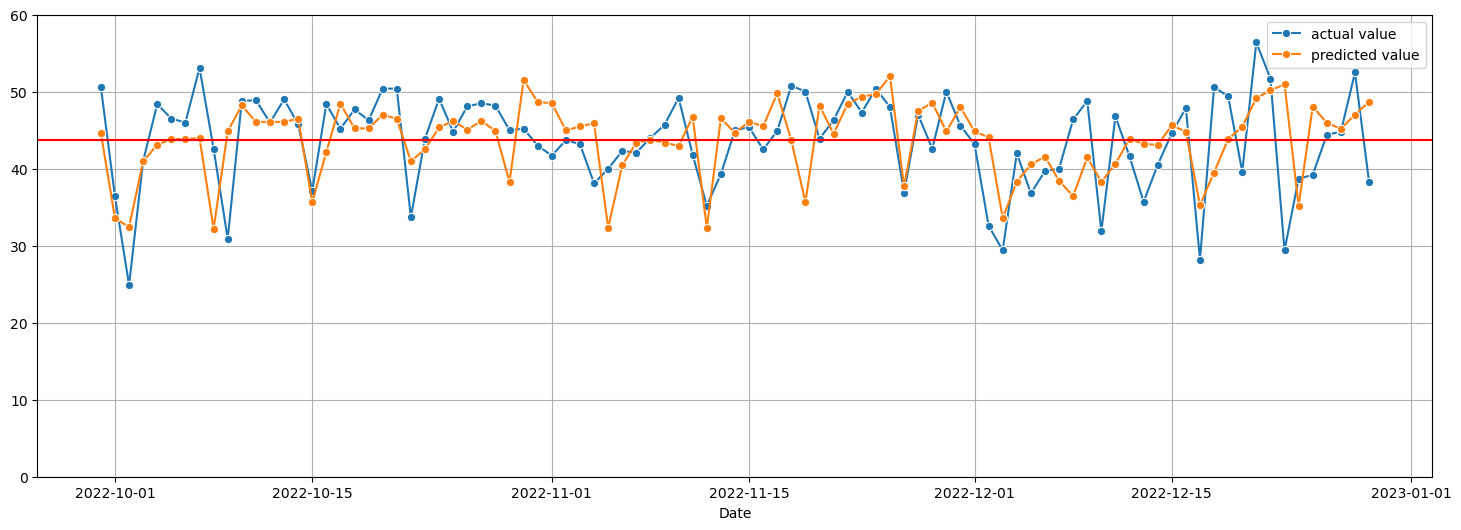

In [864]:
pred_plot(y_test, y_pred, y_test.index)